# Etude de la stabilité d'un schéma éléments finis pour l'équation de Poisson

Soit $\Omega$ le disque unité ouvert de $\mathbb{R}^2$. On considère

$$
u :
\left\{
\begin{array}{rcl}
\Omega & \longrightarrow & \mathbb{R} \\
(x,y) & \longmapsto & 1 - x^2 - y^2
\end{array}
\right.
$$

$u$ est une fonction analytique (car polynomiale) sur le domaine $\Omega$. De plus, on calcule

$$
\frac{\partial^2 u}{\partial x^2}(x, y) = - 2
$$

et 

$$
\frac{\partial^2 u}{\partial y^2}(x, y) = -2
$$

si bien que 

$$
-\Delta u \, (x, y) = 4
$$

qui est l'équation de Poisson que nous allons prendre comme problème test. D'autre part, la fonction $u$ est nulle sur le bord du disque, ce qui nous donne des conditions aux limites de Dirichlet homogènes. La formulation variationnelle associée au problème s'écrit

> **Trouver** $u \in H^1_0(\Omega)$ telle que
>
> $$
> \int_\Omega \nabla u \cdot \nabla v d\mathbf{x} = \int_\Omega f v d\mathbf{x} \hspace{30pt} \forall v \in H^1_0(\Omega)
> $$

Ce problème est implémenté dans le script `script.edp`, écrit en langage FreeFEM++. Le setup choisi est la base d'interpolation $P_1$-Lagrange et la formule de quadrature par défaut.

### Execution

In [1]:
import os
os.system("FreeFem++ poisson.edp -ns")

0

Le script écrit dans le fichier `erreur.dat` la norme $L^2(\mathcal{T}_h)$ de l'erreur entre la solution analytique et son interpolée. La norme s'écrit

$$
\epsilon := \| u - u_a \|_{L^2(\mathcal{T}_h)} = \sqrt{ \frac{1}{\left|\mathcal{T}_h\right|}\int_{\mathcal{T}_h} (u - u_a)^2 d\mathbf{x} }
$$

### Lecture des résultats

In [2]:
import pandas as pd
data = pd.read_csv("erreur.dat")
data.head()

,nbelement,erreurL2
0,8,0.182145
1,16,0.047703
2,32,0.011663
3,64,0.002901
4,128,0.000721


### Graphe de la norme de l'erreur

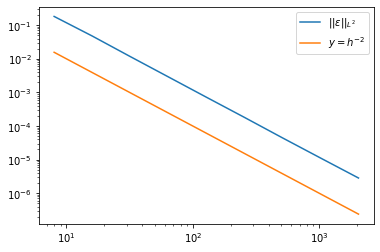

In [3]:
import matplotlib.pyplot as plt

plt.loglog(data['nbelement'], data['erreurL2'], label=r"$|| \epsilon ||_{L^2}$")
plt.loglog(data['nbelement'], 1/data['nbelement']**2, label=r"$y = h^{-2}$")
plt.legend()
plt.show()

### Bibliographie

<u> Documentation FreeFEM++, page sur les éléments finis </u> : [https://doc.freefem.org/documentation/finite-element.html](https://doc.freefem.org/documentation/finite-element.html)